
# Pewter Analytics' Analysis of King County Housing Data

# Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

# Business Problem

The city of Seattle is looking to improve low property value neighborhoods. They are looking to give grants to homeowners in neighborhoods with low-grade houses to improve the property value of the neighborhood. They want to know which neighborhoods would benefit the most from and grants. They want to know what should the homeowners use their grants for to improve the property value the most?


# Exploratory Data Analysis and Data Cleaning

The dataset consists of data on individual houses from King County in Washington state. This dataset consists of data from houses sold between May 2014 to May 2015. Using this data, we will be looking to make recommendations to the city of seattle on which variables will increase the property value the most. There are 21598 rows and 21 columns in this dataset. Our target variable in this dataset will be the "price" column, which is the amount the house was sold for.

A list and description of all columns can be found [here](https://github.com/Jyve00/Project2/blob/main/Data/column_names.md)

We intend to use the columns in our final model.:
- Latitude
- Grade
- Sqft_living
- View
- Condition
- Longitude
- Sqft lot
- Floors
- Year built





---

Each group member took an equal spread of columns to perform exploratory analysis on.

Price, grade, date, yr_built, yr_renovated, and floors were explored by [Matthew](https://github.com/Jyve00/Project2/blob/Matthew/notebooks/Matthew/Matthew-EDA.ipynb).

Condition, Waterfront, zipcode, Latitude, coordinate, long, and lat were explored by [Stephen](https://github.com/Jyve00/Project2/blob/stephen/notebooks/Stephen/data_clean.ipynb).

View, bedrooms - Number of bedrooms, bathrooms, sqft_living, and sqft_lot were explored by [Tony](https://github.com/Jyve00/Project2/blob/Tony/notebooks/Tony/DataCleaning.ipynb).

**Our exploratory analysis and cleaning of the columns in our final model can also be found below.**

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import functions
from sklearn.preprocessing import StandardScaler

In [165]:
# Import data
kc = pd.read_csv('../../Data/kc_house_data.csv')

kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Latitude/Longitude

In [166]:
# No null values in latitude, but let's check for placeholder values just in case
kc['lat'].value_counts()

47.6846    17
47.5322    17
47.6624    17
47.5491    17
47.6886    16
           ..
47.3104     1
47.4681     1
47.2819     1
47.6096     1
47.4300     1
Name: lat, Length: 5033, dtype: int64

In [167]:
# Lets check longitude as well since it is related
kc['long'].value_counts()

-122.290    115
-122.300    111
-122.362    104
-122.291    100
-122.372     99
           ... 
-121.803      1
-121.711      1
-122.454      1
-121.835      1
-121.849      1
Name: long, Length: 751, dtype: int64

## Grade

In [168]:
# Lets take a look at Grade, something that will be important for my group moving forward.
kc['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [169]:
# This is, undoubtedly, a categorical variable. This will need to be changed for our modeling later.
kc['grade'] = kc['grade'].str.split(' ').str[0].astype(int)

kc['grade'] = kc['grade'].astype('category').cat.codes

In [170]:
# Ensure Grade has been transformed
kc['grade'].value_counts()

4     8974
5     6065
6     2615
3     2038
7     1134
8      399
2      242
9       89
1       27
10      13
0        1
Name: grade, dtype: int64

## Sqft Living/Lot

In [171]:
# No null values in Sqft_Living, but let's check for placeholder values just in case
kc['sqft_living'].value_counts()


1300    138
1400    135
1440    133
1660    129
1010    129
       ... 
4970      1
2905      1
2793      1
4810      1
1975      1
Name: sqft_living, Length: 1034, dtype: int64

<AxesSubplot:>

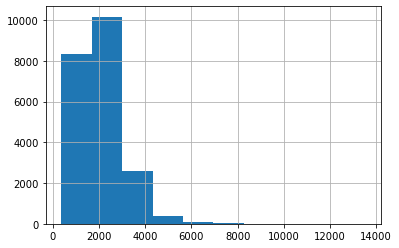

In [172]:
kc['sqft_living'].hist()

Nothing looks out of the ordinary here, though most of the values seem to be around 2000-3000 sqft.

In [173]:
kc['sqft_lot'].value_counts()


5000      358
6000      290
4000      251
7200      220
7500      119
         ... 
1448        1
38884       1
17313       1
35752       1
315374      1
Name: sqft_lot, Length: 9776, dtype: int64

<AxesSubplot:>

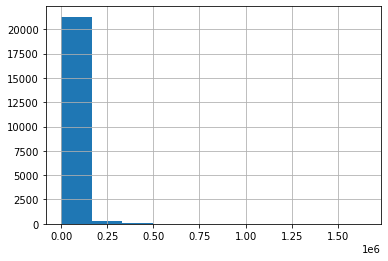

In [174]:
kc['sqft_lot'].hist()

## View

In [175]:
kc['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [176]:
# We will Encode this variable so we can use it in our model
kc['view'].replace({ 'NONE': 0, 'FAIR': 1, 'AVERAGE': 2, 'GOOD': 3, 'EXCELLENT': 5}, inplace=True)
kc['view'] = kc['view'].astype('float')

In [177]:
# Validate change
kc['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
5.0      317
Name: view, dtype: int64

## Condition

In [178]:
kc['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [179]:
# Another categorical variable that we will encode
kc['condition'].replace({ 'Poor': 0, 'Fair': 1, 'Average': 2, 'Good': 3, 'Very Good': 4}, inplace=True)

In [180]:
# Verify Successful Change
kc['condition'].value_counts()

2    14020
3     5677
4     1701
1      170
0       29
Name: condition, dtype: int64

## Floors

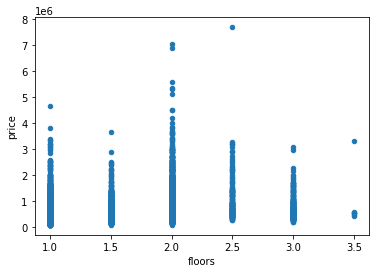

In [181]:
# Lets make sure that Floors" isn't categorical either
kc.plot(kind='scatter', x='floors', y='price');

In [182]:
kc['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [183]:
# We only have 6 distinct categories, so lets encode them using one-hot encoding
kc = pd.get_dummies(data=kc, columns=['floors'], drop_first=True)

# Verify expected changes
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int8   
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

## Year Built

In [184]:
# Checking for abnormalities in the data
kc['yr_built'].value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

<AxesSubplot:>

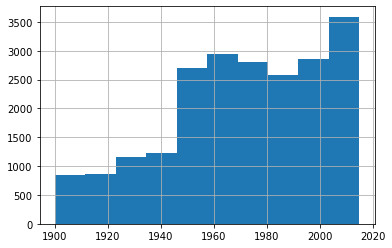

In [185]:
kc['yr_built'].hist()

# Modeling
After we each analyzed the data we decided to make a first model by pairing up our target "price" with whichever feature correlated the highest with it.[^1]


[^1]: Each team member made their own first "simple" model with the features they were investigating.

Questions to consider:

- How did you analyze the data to arrive at an initial approach?
- How did you iterate on your initial approach to make it better?
- Why are these choices appropriate given the data and the business problem?

In [186]:
# Finding correlations of all features with price.
price_corr = kc.corr()
price_corr['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.402679
bedrooms         0.308787
lat              0.306692
floors_2.0       0.232696
yr_renovated     0.129599
floors_2.5       0.122845
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
floors_3.0       0.020036
floors_3.5       0.018132
floors_1.5       0.015896
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

So our first "substandard" model would be the feature "sqft_living" against the target variable "price"

## Model Evaluation
Before continuing a note about how we evaluated our models. We decided to focus on three primary metrics to measure our models against eachother:

- R-Squared
- Mean Squared Error
- Mean Absolute Error

We also checked the assumptions of linearity for each model, and factored that into our analysis:

- Linearity
- Multicolinearity
- Residual Normality
- Heteroskedacity

Our functions for checking all of these things can be found in our [functions](https://github.com/Jyve00/Project2/blob/main/functions.py) file


## First Substandard Model: price ~ sqft_living


In [187]:
#Train/Test Split
X = kc.drop(columns=['price', 'date', 'yr_renovated'])
y = kc['price']

# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=50)

model = sm.OLS(y_train, sm.add_constant(X_train['sqft_living'])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 1.409e+04
Date:                Fri, 08 Oct 2021   Prob (F-statistic):               0.00
Time:                        08:42:48   Log-Likelihood:            -2.0114e+05
No. Observations:               14469   AIC:                         4.023e+05
Df Residuals:                   14467   BIC:                         4.023e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.406e+04   5402.737     -8.155      0.000   -5.46e+04   -3.35e+04
sqft_living   281.4220      2.370    118.722      0.000     276.776     286.068
==============================================================================
Omnibus:                     9615.477   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           291254.112
Skew:                           2.753   Prob(JB):                         0.00
Kurtosis:                      24.279   Cond. No.                     5.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [188]:
# Get model predictions
train_preds = model.predict(sm.add_constant(X_train['sqft_living']))
test_preds = model.predict(sm.add_constant(X_test['sqft_living']))

# Evaluate performance of model
functions.evaluate(y_train, train_preds, y_test, test_preds)

Train R2: 0.4935
Test R2: 0.4909
****
Train RMSE: $263,750.05
Test RMSE: $257,358.44
****
Train MAE: $174,771.24
Test MAE: $172,498.31


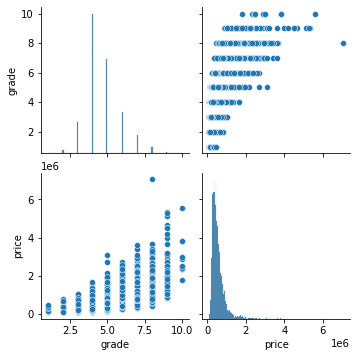

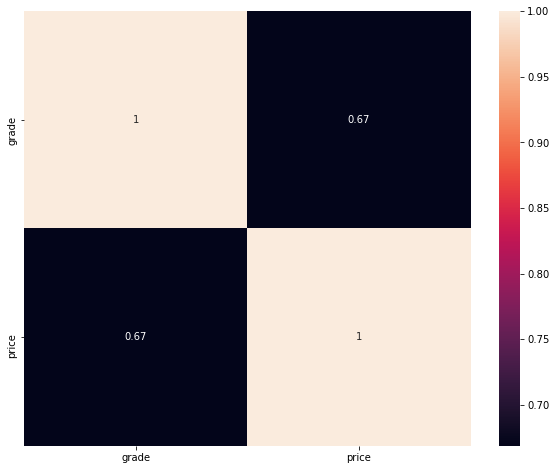

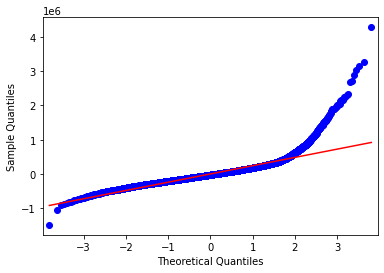

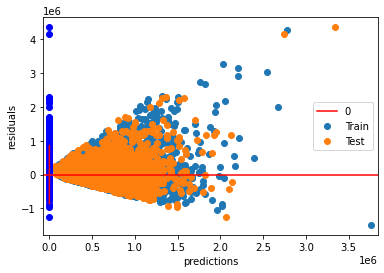

In [189]:
# Check Assumptions of Linearity
functions.check_assumptions(X_train['grade'], y_train, train_preds, test_preds, y_test)

### Price ~ Sqft_living Conclusion

Our first substandard model had an R2 of about 0.49, and it was typically off by about $260,000. It also clearly violates the "Residual Normality" and "Heteroskedacity" assumptions of linearity. We decided this would be a good baseline model to compare future ones to. We also realised that "price" had some high outliers, and decided it would be best if we were to remove the top 5% of houses in price.

# Modeling Iterations

All three team members each then iterated on their substandard model. Once each group member had reached a model they were satisfied with, we presented the model to the group, and then combined all the features of those models into one. We then tweaked the final model from there.

You can see the full modeling proccess for each member here:
- [Tony](https://github.com/Jyve00/Project2/blob/Tony/notebooks/Tony/DataModeling.ipynb)
- [Matthew](https://github.com/Jyve00/Project2/blob/Matthew/notebooks/Matthew/Matthew-Modeling.ipynb)
- [Stephen](https://github.com/Jyve00/Project2/blob/stephen/notebooks/Stephen/modeling.ipynb)

In [190]:
# code here to iteratively improve your models

In [191]:
# code here to evaluate your iterations

### 'Final' Model

In the end, you'll arrive at a 'final' model - aka the one you'll use to make your recommendations/conclusions. This likely blends any group work. It might not be the one with the highest scores, but instead might be considered 'final' or 'best' for other reasons.

In [192]:
# code here to show your final model
# Import data

#Matt's Data
kc = pd.read_csv('../../Data/matthew_clean_data.csv', index_col=0)
kc_trim = kc[kc['price'] < kc['price'].quantile(0.95)]

# Steve's data
s = pd.read_csv('../../Data/my_filtered_dataframe_id.csv', index_col=0)

# Tony's data
t = pd.read_csv('../../Data/cleanhousedata_id.csv', index_col=0)

# Merging all data on index
t.set_index('id')
kc.set_index('id')
kct = kc_trim.merge(t, on='id')
s.set_index('id')
all_clean = kct.merge(s, on='id')

# Cleaning up data, same way steve cleaned.
all_clean['view_y'].replace({ 'NONE': 0, 'FAIR': 1, 'AVERAGE': 2, 'GOOD': 3, 'EXCELLENT': 5}, inplace=True)
all_clean['view_y'] = all_clean['view_y'].astype('float')

# Dropping all copies, and columns with high multicolinearity
all_clean.drop(
    columns=['date_x', 'yr_renovated_x', 'waterfront', 'cat_waterfront', 'view_x', 'cat_view', 'cat_condition',
             'cat_grade', 'price_x', 'date_y', 'yr_renovated_y', 'price_y', 'floors_3.5', 'zipcode', 'id', 'cat_zipcode', 'bedrooms', 'yr_built_y', 'grade_y', 'floors_2.5', 'bathrooms', 'floors_2.0'], inplace=True)

# Final check of dataframe.
all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18183 entries, 0 to 18182
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   grade_x      18183 non-null  int64  
 1   yr_built_x   18183 non-null  int64  
 2   floors_1.5   18183 non-null  int64  
 3   floors_3.0   18183 non-null  int64  
 4   sqft_living  18183 non-null  int64  
 5   sqft_lot     18183 non-null  int64  
 6   price        18183 non-null  float64
 7   condition    18183 non-null  int64  
 8   view_y       18183 non-null  float64
 9   lat          18183 non-null  float64
 10  long         18183 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 1.7 MB


In [193]:
ss = StandardScaler()
X = all_clean.drop(columns=['price'])
colms = X.columns
y = all_clean['price']
X = pd.DataFrame(X, columns=colms)
X = ss.fit_transform(X)
# Placing back into a dataframe
X = pd.DataFrame(X, columns=colms)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=50)

model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
#model.summary()
model.summary2(float_format='%.4f')



<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
=========================================================================
Model:                 OLS               Adj. R-squared:      0.598      
Dependent Variable:    price             AIC:                 312500.1406
Date:                  2021-10-08 08:42  BIC:                 312581.6254
No. Observations:      12182             Log-Likelihood:      -1.5624e+05
Df Model:              10                F-statistic:         1810.      
Df Residuals:          12171             Prob (F-statistic):  0.00       
R-squared:             0.598             Scale:               8.0895e+09 
-------------------------------------------------------------------------
               Coef.     Std.Err.    t     P>|t|     [0.025      0.975]  
-------------------------------------------------------------------------
const       405938.4908  815.0094 498.0783 0.0000 404340.9430 407536.0387
grade_x      53671.7880 1164.3070  46.0976 0.0000  51389.5613  55954.0148
yr_built_x  -20413.9638 1209.5902 -16.8768 0.0000 -22784.9529 -18042.9748
floors_1.5    5494.2017  894.6941   6.1409 0.0000   3740.4592   7247.9442
floors_3.0    5182.9377  887.3240   5.8411 0.0000   3443.6417   6922.2337
sqft_living  44730.0395 1082.6073  41.3170 0.0000  42607.9572  46852.1218
sqft_lot      6920.6876  964.5730   7.1749 0.0000   5029.9712   8811.4040
condition    10615.6744  856.3296  12.3967 0.0000   8937.1324  12294.2164
view_y       11906.9440  834.1047  14.2751 0.0000  10271.9661  13541.9218
lat          69285.7290  861.8112  80.3955 0.0000  67596.4421  70975.0158
long          7269.1826  936.1174   7.7652 0.0000   5434.2437   9104.1216
-------------------------------------------------------------------------
Omnibus:                147.372         Durbin-Watson:            1.977  
Prob(Omnibus):          0.000           Jarque-Bera (JB):         160.264
Skew:                   0.240           Prob(JB):                 0.000  
Kurtosis:               3.294           Condition No.:            3      
=========================================================================

"""

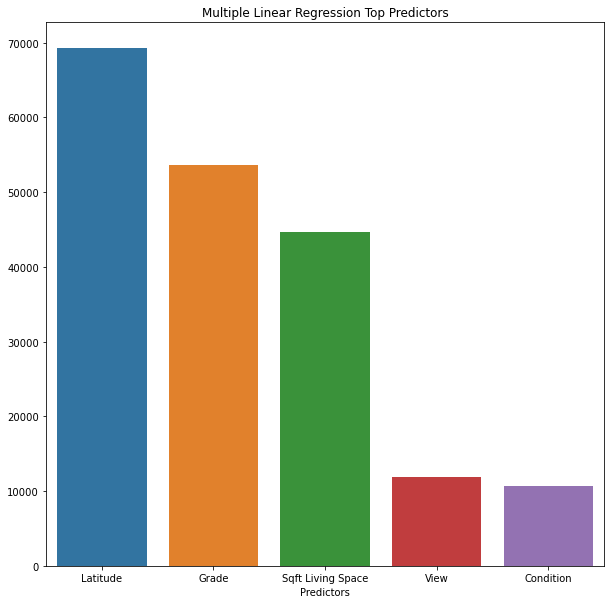

In [197]:
# Top model parameters
params = model.params.sort_values(ascending=False)

# Bar Graph of model parameters
fig, ax = plt.subplots(figsize=(10,10))
plt.title('Multiple Linear Regression Top Predictors')
plt.xlabel('Predictors')
pindex = ['Latitude', 'Grade', 'Sqft Living Space', 'View', 'Condition']
pvalues = params.values[1:6]
sns.barplot(x=pindex, y=pvalues);

In [195]:
# Model Predictions
train_preds = model.predict(sm.add_constant(X_train))
test_preds = model.predict(sm.add_constant(X_test))

# Evaluate R2, RMSE, and MAE
functions.evaluate(y_train, train_preds, y_test, test_preds)

Train R2: 0.5979
Test R2: 0.5983
****
Train RMSE: $89,901.09
Test RMSE: $89,404.95
****
Train MAE: $70,976.70
Test MAE: $70,238.69


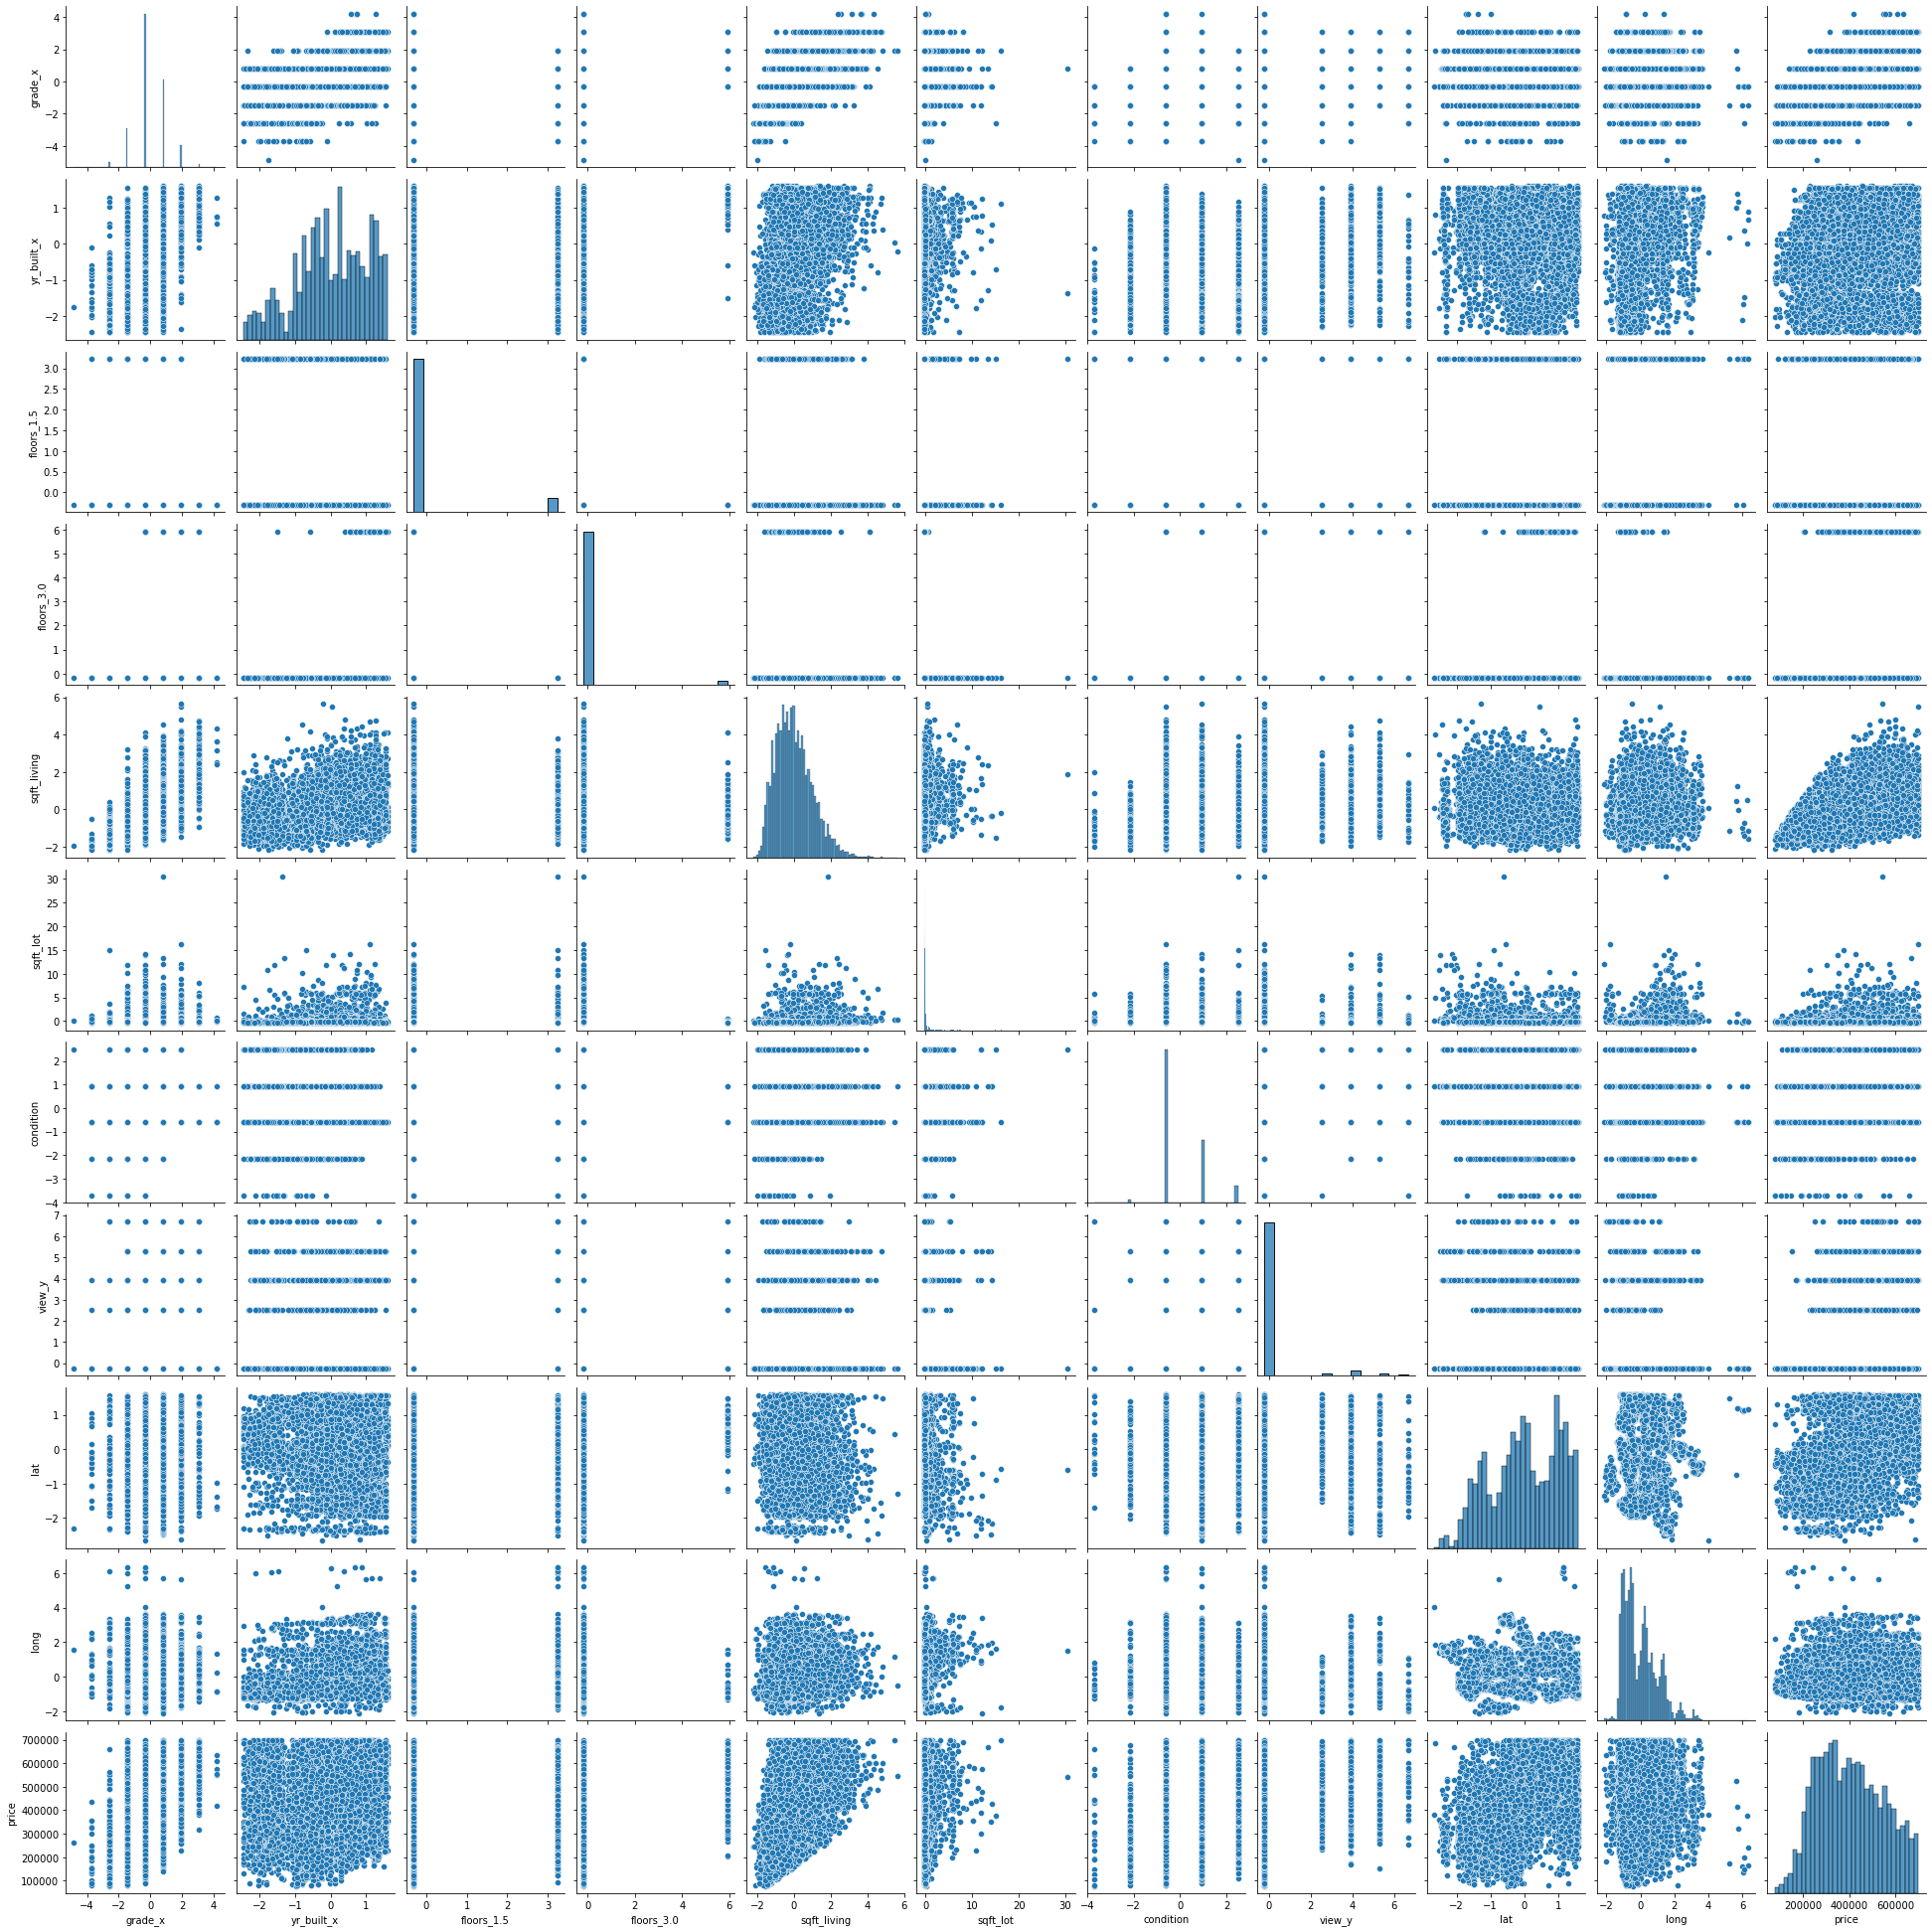

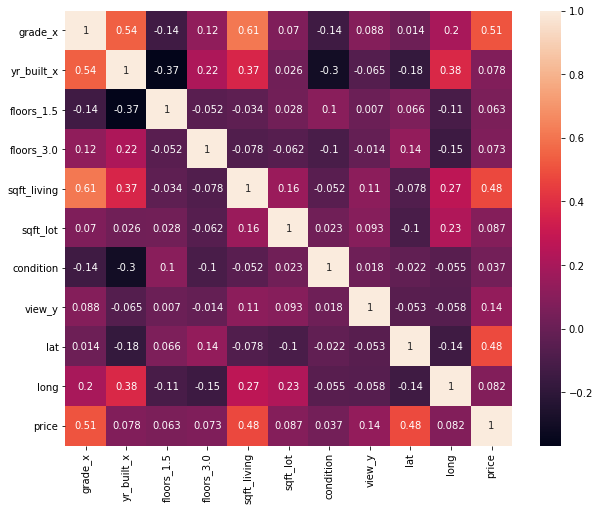

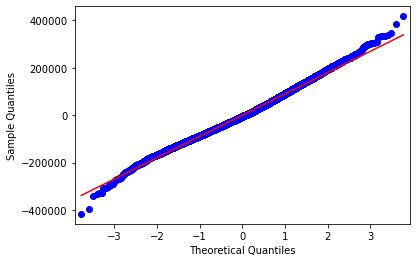

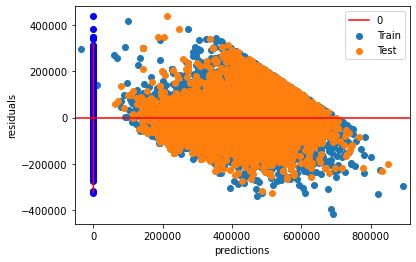

In [196]:
# Checking colinearity
functions.check_assumptions(X_train[colms], y_train, train_preds, test_preds, y_test)

## Conclusions

Our final model is typically of by $88k~$90k USD. We considered how we should recommend features for the city to give grants for and looked at the importance of the features in our model. We decided that even though Latitude, grade, and SQFT Living Space were are important features we did not want to recommend them. First, it would not be feasible for homeowners to attempt to change the latitude or grade of their house. Second, a homeowner would need a significant amount of money from the grant in order to change the Living Space of their house, and we decided that it would be also be unrealistic and too expensive to ask them to do so.

Because of this, **we recommend that the city give grants for improving the condition of the house.** This is the most realistic option among the most important features in our model. We have also prepared a list of low value homes that have not been renovated, in hopes of providing a starting point for the city to determining who may be eligible for these grants.

The primary issue this model may not solve, however, is the costs associated with repairing homes. Moving forward, we would like to analyze the differences in costs it may take to repair homes in different kinds of conditions.